# Customer Churn Prediction

# Task - 3

Import

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import(
accuracy_score,
precision_score,
recall_score,
f1_score,
confusion_matrix,
classification_report
)

In [2]:
df = pd.read_csv('/Users/jayashar/Desktop/Machine Learning Intership/Task3_Customer_Churn_Prediction/data/Churn_Modelling.csv')
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [5]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [7]:
df['Exited'].value_counts()

Exited
0    7963
1    2037
Name: count, dtype: int64

In [8]:
df = df.drop(columns = ['RowNumber','CustomerId','Surname'])

Separate Categorical & Numerical Columns

In [10]:
categorical_cols = df.select_dtypes(include = 'object').columns
numerical_cols = df.select_dtypes(exclude = 'object').columns

print("Categorical columns :",categorical_cols)
print("Numerical columns :",numerical_cols)

Categorical columns : Index(['Geography', 'Gender'], dtype='object')
Numerical columns : Index(['CreditScore', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')


Encode Categorical Variables

In [11]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

Split Features & Target

In [12]:
X = df.drop('Exited',axis=1)
y = df['Exited']

Train / Validation Split

In [14]:
from sklearn.model_selection import train_test_split

X_train , X_val , y_train , y_val = train_test_split(
    X,
    y,
    test_size = 0.2,
    random_state = 42,
    stratify = y
)

print("Train shape :",X_train.shape)
print("Validation shape :",X_val.shape)

Train shape : (8000, 10)
Validation shape : (2000, 10)


In [17]:
from sklearn.linear_model import LogisticRegression


churn_lr = LogisticRegression(
    max_iter = 1000,
    class_weight = 'balanced',
    random_state = 42
)
churn_lr.fit(X_train , y_train)

/opt/anaconda3/lib/python3.13/site-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(class_weight='balanced', max_iter=1000, random_state=42)

In [18]:
y_val_pred_lr = churn_lr.predict(X_val)

In [19]:
from sklearn.metrics import confusion_matrix

print("=== Logistic Regression : Validation Performance ===\n")

print("Accuracy:", accuracy_score(y_val, y_val_pred_lr))
print("Precision:", precision_score(y_val, y_val_pred_lr))
print("Recall:", recall_score(y_val, y_val_pred_lr))
print("F1 Score:", f1_score(y_val, y_val_pred_lr))

print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred_lr, zero_division=0))

=== Logistic Regression : Validation Performance ===

Accuracy: 0.6825
Precision: 0.3582089552238806
Recall: 0.7076167076167076
F1 Score: 0.4756399669694467

Classification Report:

              precision    recall  f1-score   support

           0       0.90      0.68      0.77      1593
           1       0.36      0.71      0.48       407

    accuracy                           0.68      2000
   macro avg       0.63      0.69      0.62      2000
weighted avg       0.79      0.68      0.71      2000



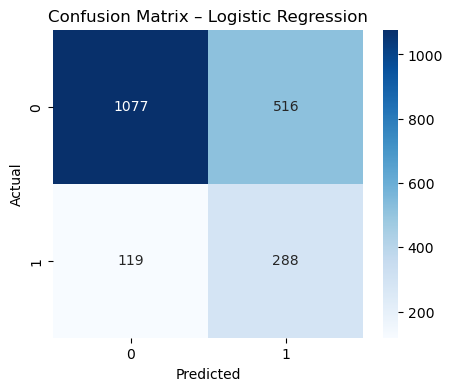

In [20]:
cm = confusion_matrix(y_val, y_val_pred_lr)

plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Logistic Regression")
plt.show()

In [21]:
from sklearn.ensemble import RandomForestClassifier

churn_rf = RandomForestClassifier(
    n_estimators = 200,
    random_state = 42,
    class_weight = 'balanced',
    n_jobs = -1
)
churn_rf.fit(X_train,y_train)

RandomForestClassifier(class_weight='balanced', n_estimators=200, n_jobs=-1,
                       random_state=42)

In [22]:
y_val_pred_rf = churn_rf.predict(X_val)

In [23]:
print("=== Random Forest : Validation Performance ===\n")

print("Accuracy:", accuracy_score(y_val, y_val_pred_rf))
print("Precision:", precision_score(y_val, y_val_pred_rf))
print("Recall:", recall_score(y_val, y_val_pred_rf))
print("F1 Score:", f1_score(y_val, y_val_pred_rf))

print("\nClassification Report:\n")
print(classification_report(y_val, y_val_pred_rf, zero_division=0))

=== Random Forest : Validation Performance ===

Accuracy: 0.8565
Precision: 0.7608695652173914
Recall: 0.42997542997543
F1 Score: 0.5494505494505495

Classification Report:

              precision    recall  f1-score   support

           0       0.87      0.97      0.91      1593
           1       0.76      0.43      0.55       407

    accuracy                           0.86      2000
   macro avg       0.81      0.70      0.73      2000
weighted avg       0.85      0.86      0.84      2000



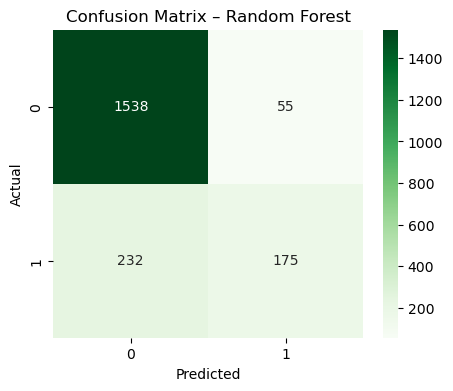

In [24]:
cm_rf = confusion_matrix(y_val, y_val_pred_rf)

plt.figure(figsize=(5,4))
sns.heatmap(cm_rf, annot=True, fmt='d', cmap='Greens')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix – Random Forest")
plt.show()

## Model Comparison

Logistic Regression served as a baseline model and provided good
interpretability with reasonable churn recall.

Random Forest improved overall performance by capturing non-linear
patterns in the data, leading to better precision and F1-score while
maintaining strong recall.

Based on validation results, Random Forest was selected as the final
model for churn prediction.

## Conclusion

In this project, a customer churn prediction system was developed using
machine learning techniques. After preprocessing and feature encoding,
a Logistic Regression model was trained as a baseline.

To improve performance, a Random Forest classifier was applied, which
demonstrated better balance between precision and recall. This highlights
the importance of model selection and evaluation metrics in churn
prediction tasks.

The final model can help businesses identify customers at risk of
churning and take proactive retention measures.